In [222]:
import torch
import importlib
import sys
#importlib.reload(sys.modules['fairseq.models.roberta'])
from fairseq.models.roberta import RobertaModel

In [2]:
cola = RobertaModel.from_pretrained(
    '../logs/large/CoLA/l1ft-1e-5-0.001-1',
    checkpoint_file='checkpoint_best.pt',
    data_name_or_path='/share2/gzhch/data/glue/CoLA-bin/'
)

/home/gzhch/anaconda3/envs/fairseq/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [29]:
cola2 = RobertaModel.from_pretrained(
    '../logs/large/CoLA/l1ft-1e-5-0.001-2',
    checkpoint_file='checkpoint_best.pt',
    data_name_or_path='/share2/gzhch/data/glue/CoLA-bin/'
)

In [3]:
mrpc = RobertaModel.from_pretrained(
    '../logs/large/MRPC/l1ft-1e-5-0.001-1',
    checkpoint_file='checkpoint_best.pt',
    data_name_or_path='/share2/gzhch/data/glue/MRPC-bin/'
)

/home/gzhch/anaconda3/envs/fairseq/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [223]:
mnli1 = RobertaModel.from_pretrained(
    '../logs/large/MNLI/l1ft-1e-5-0.001-1',
    checkpoint_file='checkpoint_best.pt',
    data_name_or_path='/share2/gzhch/data/glue/MNLI-bin/'
)
mnli2 = RobertaModel.from_pretrained(
    '../logs/large/MNLI/l1ft-1e-5-0.001-2',
    checkpoint_file='checkpoint_best.pt',
    data_name_or_path='/share2/gzhch/data/glue/MNLI-bin/'
)
mnli3 = RobertaModel.from_pretrained(
    '../logs/large/MNLI/l1ft-1e-5-0.0005-1',
    checkpoint_file='checkpoint_best.pt',
    data_name_or_path='/share2/gzhch/data/glue/MNLI-bin/'
)

In [224]:
qnli = RobertaModel.from_pretrained(
    '../logs/large/QNLI/l1ft-1e-5-0.001-1',
    checkpoint_file='checkpoint_best.pt',
    data_name_or_path='/share2/gzhch/data/glue/QNLI-bin/'
)

In [251]:
sst = RobertaModel.from_pretrained(
    '../logs/large/SST-2/l1ft-1e-5-0.001-1',
    checkpoint_file='checkpoint_best.pt',
    data_name_or_path='/share2/gzhch/data/glue/SST-2-bin/'
)

In [255]:
qqp = RobertaModel.from_pretrained(
    '../logs/large/QQP/l1ft-1e-5-0.001-1',
    checkpoint_file='checkpoint_best.pt',
    data_name_or_path='/share2/gzhch/data/glue/QQP-bin/'
)

In [129]:
def extract_matrix(m):
    return m.weight_upd - m.weight, m.bias_upd - m.bias

def extract_layer(l):
    res = {}
    res['Q'] = (extract_matrix(l.self_attn.q_proj))
    res['K'] = (extract_matrix(l.self_attn.k_proj))
    res['V'] = (extract_matrix(l.self_attn.v_proj))
    res['O'] = (extract_matrix(l.self_attn.out_proj))
    res['LN1'] = (extract_matrix(l.self_attn_layer_norm))
    res['FC1'] = (extract_matrix(l.fc1))
    res['FC2'] = (extract_matrix(l.fc2))
    res['LN2'] = (extract_matrix(l.final_layer_norm))
    return res

def ratio_of_nonzero(m):
    w, b = m
    d = len(w.shape)
    if d == 1:
        size = w.shape[0]
    else:
        size = w.shape[0] * w.shape[1]
    r1 = int((w != 0).sum()) / int(size)
    r2 = int((b != 0).sum()) / int(b.shape[0])
    return r1, r2

def format_ratio(a):
    res = {k : [] for k, _ in a[0].items()}
    for l in a:
        for k, v in l.items():
            res[k].append(v)
    return res

In [52]:
d_cola = []
for l in cola.model.encoder.sentence_encoder.layers:
    d_cola.append(extract_layer(l))

In [16]:
d_mrpc = []
for l in mrpc.model.encoder.sentence_encoder.layers:
    d_mrpc.append(extract_layer(l))

In [30]:
d_cola2 = []
for l in cola2.model.encoder.sentence_encoder.layers:
    d_cola2.append(extract_layer(l))

In [259]:
d_mnli1 = []
for l in mnli1.model.encoder.sentence_encoder.layers:
    d_mnli1.append(extract_layer(l))
d_mnli2 = []
for l in mnli2.model.encoder.sentence_encoder.layers:
    d_mnli2.append(extract_layer(l))
d_mnli3 = []
for l in mnli3.model.encoder.sentence_encoder.layers:
    d_mnli3.append(extract_layer(l))
d_qnli = []
for l in qnli.model.encoder.sentence_encoder.layers:
    d_qnli.append(extract_layer(l))
d_sst = []
for l in sst.model.encoder.sentence_encoder.layers:
    d_sst.append(extract_layer(l))
d_qqp = []
for l in qqp.model.encoder.sentence_encoder.layers:
    d_qqp.append(extract_layer(l))

In [31]:
r_cola = []
for l in d_cola:
    r_cola.append({k: ratio_of_nonzero(v) for k, v in l.items()})
r_cola2 = []
for l in d_cola2:
    r_cola2.append({k: ratio_of_nonzero(v) for k, v in l.items()})
r_mrpc = []
for l in d_mrpc:
    r_mrpc.append({k: ratio_of_nonzero(v) for k, v in l.items()})

In [264]:
r_mnli1 = []
for l in d_mnli1:
    r_mnli1.append({k: ratio_of_nonzero(v) for k, v in l.items()})
r_mnli2 = []
for l in d_mnli2:
    r_mnli2.append({k: ratio_of_nonzero(v) for k, v in l.items()})
r_mnli3 = []
for l in d_mnli3:
    r_mnli3.append({k: ratio_of_nonzero(v) for k, v in l.items()})
r_qnli = []
for l in d_qnli:
    r_qnli.append({k: ratio_of_nonzero(v) for k, v in l.items()})
r_sst = []
for l in d_sst:
    r_sst.append({k: ratio_of_nonzero(v) for k, v in l.items()})
r_qqp = []
for l in d_qqp:
    r_qqp.append({k: ratio_of_nonzero(v) for k, v in l.items()})

In [59]:
import seaborn as sns
import pandas
import matplotlib.pyplot as plt

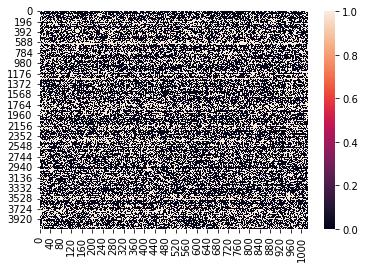

In [95]:
t = (d_cola[15]['FC1'][0] != 0).tolist()
pd = pandas.DataFrame(t)
sns.heatmap(pd)
plt.show()

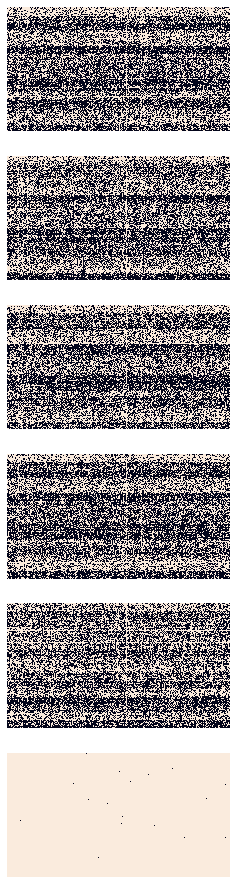

In [267]:
l = 15
name = 'Q'

fig, axs = plt.subplots(6)
fig.set_size_inches(4, 16)
t_mnli1 = (d_mnli1[l][name][0] != 0).tolist()
t_mnli2 = (d_mnli2[l][name][0] != 0).tolist()
t_mnli3 = (d_mnli3[l][name][0] != 0).tolist()
t_qnli = (d_qnli[l][name][0] != 0).tolist()
t_sst = (d_sst[l][name][0] != 0).tolist()
t_qqp = (d_qqp[l][name][0] != 0).tolist()
g1 = sns.heatmap(pandas.DataFrame(t_mnli1), ax=axs[0], xticklabels = False, yticklabels = False, cbar = False)
g2 = sns.heatmap(pandas.DataFrame(t_mnli2), ax=axs[1], xticklabels = False, yticklabels = False, cbar = False)
g3 = sns.heatmap(pandas.DataFrame(t_mnli3), ax=axs[2], xticklabels = False, yticklabels = False, cbar = False)
g4 = sns.heatmap(pandas.DataFrame(t_qnli), ax=axs[3], xticklabels = False, yticklabels = False, cbar = False)
g5 = sns.heatmap(pandas.DataFrame(t_sst), ax=axs[4], xticklabels = False, yticklabels = False, cbar = False)
g6 = sns.heatmap(pandas.DataFrame(t_qqp), ax=axs[5], xticklabels = False, yticklabels = False, cbar = False)

plt.show()

In [134]:
dict_mrpc = format_ratio(r_mrpc)
dict_mnli = format_ratio(r_mnli)
dict_cola = format_ratio(r_cola)
dict_cola2 = format_ratio(r_cola2)

In [265]:
dict_qqp = format_ratio(r_qqp)

In [266]:
dict_qqp['FC2']

[(0.9988048076629639, 1.0),
 (0.995668888092041, 0.9990234375),
 (0.997962474822998, 1.0),
 (0.9992733001708984, 1.0),
 (0.9992794990539551, 0.9990234375),
 (0.999302864074707, 0.9990234375),
 (0.9993433952331543, 1.0),
 (0.9993667602539062, 0.9990234375),
 (0.9994690418243408, 1.0),
 (0.9995129108428955, 1.0),
 (0.9995307922363281, 1.0),
 (0.9995400905609131, 1.0),
 (0.9995307922363281, 1.0),
 (0.9994902610778809, 1.0),
 (0.9994947910308838, 1.0),
 (0.9994935989379883, 1.0),
 (0.9995191097259521, 1.0),
 (0.9995110034942627, 1.0),
 (0.9995200634002686, 0.9990234375),
 (0.999506950378418, 1.0),
 (0.9994595050811768, 1.0),
 (0.9994261264801025, 1.0),
 (0.9994151592254639, 0.998046875),
 (0.9994285106658936, 1.0)]

In [218]:
dict_mnli['LN2']

[(0.2119140625, 0.712890625),
 (0.24609375, 0.728515625),
 (0.2431640625, 0.7919921875),
 (0.2421875, 0.8359375),
 (0.2626953125, 0.8642578125),
 (0.275390625, 0.8515625),
 (0.2861328125, 0.8662109375),
 (0.287109375, 0.86328125),
 (0.310546875, 0.8828125),
 (0.29296875, 0.8759765625),
 (0.306640625, 0.8828125),
 (0.322265625, 0.8544921875),
 (0.3046875, 0.8818359375),
 (0.302734375, 0.8359375),
 (0.248046875, 0.8330078125),
 (0.244140625, 0.8544921875),
 (0.208984375, 0.83203125),
 (0.1806640625, 0.8232421875),
 (0.1572265625, 0.8134765625),
 (0.1162109375, 0.7744140625),
 (0.1064453125, 0.748046875),
 (0.099609375, 0.6435546875),
 (0.1181640625, 0.51953125),
 (0.1083984375, 0.2080078125)]

In [187]:
def average(l):
    s = 0
    for i in l:
        s += i
    return s/len(l)

def avg(d):
    dw = [i[0] for i in d]
    db = [i[1] for i in d]
    return average(dw), average(db)

In [197]:
avg(dict_mnli['LN2'])

(0.22843424479166666, 0.7824300130208334)

In [2]:
mnli1

NameError: name 'mnli1' is not defined